In [2]:
import gymnasium as gym
env = gym.make("LunarLander-v2")
observation, _ = env.reset()

print(observation)
print(env.action_space)

fitness = 0.0
terminated = False
truncated = False
while not (terminated or truncated):
    observation, reward, terminated, truncated, info = env.step(env.action_space.sample())
    #print(env.action_space.sample())
    print(observation[6], observation[7])
    #print(terminated, truncated)
    #print(reward)
    fitness += reward

print(fitness)

[-0.00398607  1.4125063  -0.40375748  0.07049739  0.0046256   0.09145711
  0.          0.        ]
Discrete(4)
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0
0.0 1.0
0.0 1.0
1.0 1.0
-107.81617551522926


/home/pmedur/strojnoUcenje/env/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/pmedur/strojnoUcenje/env/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/pmedur/strojnoUcenje/env/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/pmedur/strojnoUcenje/env/lib/python3.10/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):
/home/pmedur/strojnoUcenje/e


 ****** Running generation 0 ****** 

Population's average fitness: -410.81385 stdev: 239.73169
Best fitness: -105.52067 - size: (4, 16) - species 1 - id 77
Average adjusted fitness: 0.770
Mean genetic distance 3.003, standard deviation 0.584
Population of 150 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====  ===  ====  =======  =======  ====
     1    0    12   -105.5    0.702     0
     2    0    20   -110.9    0.783     0
     3    0    44   -114.8    0.765     0
     4    0    24   -253.7    0.646     0
     5    0    26   -242.9    0.771     0
     6    0    24   -128.8    0.950     0
Total extinctions: 0
Generation time: 3.891 sec

 ****** Running generation 1 ****** 

Population's average fitness: -210.47949 stdev: 140.47861
Best fitness: -89.23942 - size: (4, 16) - species 4 - id 161
Average adjusted fitness: 0.834
Mean genetic distance 2.955, standard deviation 0.660
Population of 150 members in 6 species:
   ID   age  size  fitness  adj fit  stag
  ====

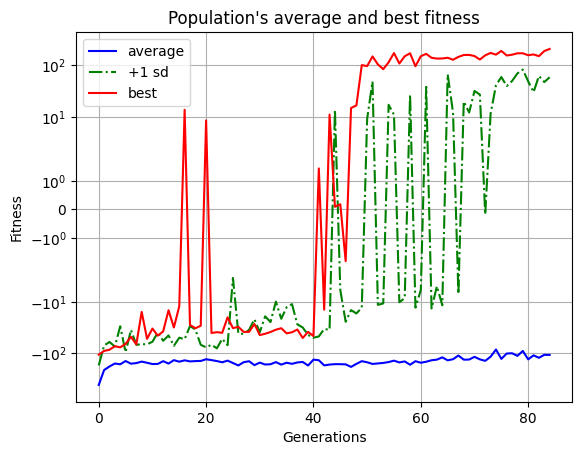

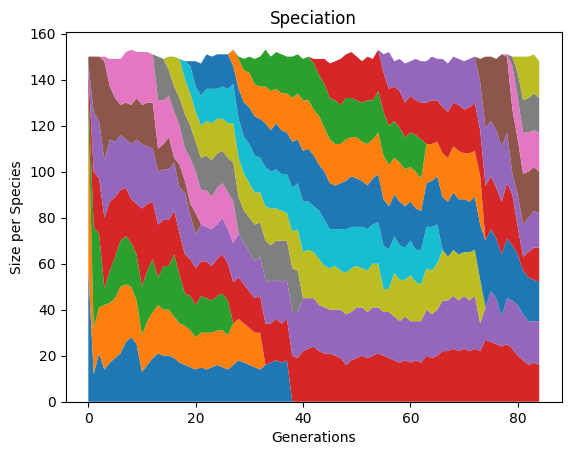

In [2]:
import multiprocessing
import os
import pickle

import cart_pole
import neat
import visualize
import gym
import numpy as np

runs_per_net = 10
# Use the NN network phenotype and the discrete actuator force function.
def eval_genome(genome, config):
    net = neat.nn.FeedForwardNetwork.create(genome, config)

    fitnesses = []

    for runs in range(runs_per_net):
        env = gym.make("LunarLander-v2")

        observation, _ = env.reset()
        #print(observation)
        fitness = 0.0
        terminated = False
        truncated = False
        while not (terminated or truncated):
            
            action = net.activate(observation)
            #print("ACTION: ", action, "\n")
            action =  action.index(max(action))
            #print("ACTION ARGMAX: ", action , "\n")
            observation, reward, terminated, truncated, info = env.step(action)
            #print("REWARD: ", reward, "\n")
            fitness += reward

        fitnesses.append(fitness)

    return np.mean(fitnesses)

def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        genome.fitness = eval_genome(genome, config)


def run():
    # Load the config file, which is assumed to live in
    # the same directory as this script.

    local_dir = os.path.dirname('__file__')
    config_path = os.path.join(local_dir, 'LunarLander_config')
    config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                         neat.DefaultSpeciesSet, neat.DefaultStagnation,
                         config_path)
    
    pop = neat.Population(config)
    stats = neat.StatisticsReporter()
    pop.add_reporter(stats)
    pop.add_reporter(neat.StdOutReporter(True))

    pe = neat.ParallelEvaluator(multiprocessing.cpu_count(), eval_genome)

    #saving checkpoints in a folder
    checkpoint_folder = "LunarLander_checkpoints"
    if not os.path.exists(checkpoint_folder):
        os.makedirs(checkpoint_folder)
    
    # Specify the path for checkpoints
    checkpoint_path = os.path.join(checkpoint_folder, "checkpoint-")
    
    # Create the Checkpointer with the desired configuration
    checkpointer = neat.Checkpointer(10, filename_prefix=checkpoint_path)
    pop.add_reporter(checkpointer)
    
    winner = pop.run(pe.evaluate, 500)

    # Save the winner.
    with open('winner-LunarLander', 'wb') as f:
        pickle.dump(winner, f)

    print(winner)

    visualize.plot_stats(stats, ylog=True, view=True, filename="LunarLander-fitness.svg")
    visualize.plot_species(stats, view=True, filename="LunarLander-speciation.svg")

    visualize.draw_net(config, winner, True)

    visualize.draw_net(config, winner, view=True, filename="winner-LunarLander.gv")
    #visualize.draw_net(config, winner, view=True, node_names=node_names,
    #                   filename="winner-feedforward-enabled-pruned.gv", prune_unused=True)

if __name__ == '__main__':
    run()

In [5]:
import os
import pickle
import neat
import gym 
import numpy as np
from gym.wrappers.record_video import RecordVideo

# load the winner
with open('winner-LunarLander', 'rb') as f:
    c = pickle.load(f)

print('Loaded genome:')
print(c)

# Load the config file, which is assumed to live in
# the same directory as this script.
local_dir = os.path.dirname('__file__')
config_path = os.path.join(local_dir, 'LunarLander_config')
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)

net = neat.nn.FeedForwardNetwork.create(c, config)


env = gym.make("LunarLander-v2", render_mode="rgb_array")
env = RecordVideo(env, './video',  episode_trigger=lambda x: x % 2 == 0)
observation, _ = env.reset()

env.start_video_recorder()
terminated = False
truncated = False
while not (terminated or truncated):
    action = net.activate(observation)
    action =  np.argmax(action)
    observation, reward, terminated, truncated, info = env.step(action)
    #env.render()


env.close_video_recorder()

env.close()

Loaded genome:
Key: 10672
Fitness: 208.61136274211975
Nodes:
	0 DefaultNodeGene(key=0, bias=1.2348060529533889, response=1.0325373635007216, activation=clamped, aggregation=sum)
	1 DefaultNodeGene(key=1, bias=0.03892168752132674, response=1.0626493421403767, activation=clamped, aggregation=sum)
	2 DefaultNodeGene(key=2, bias=-1.4397072746009068, response=1.0569555795235188, activation=clamped, aggregation=sum)
	3 DefaultNodeGene(key=3, bias=-4.639496786698721, response=0.9229426941312077, activation=clamped, aggregation=sum)
	772 DefaultNodeGene(key=772, bias=-0.5562916490965742, response=0.9652186170210783, activation=clamped, aggregation=sum)
	891 DefaultNodeGene(key=891, bias=4.771686831618512, response=0.998828698549848, activation=clamped, aggregation=sum)
	951 DefaultNodeGene(key=951, bias=-0.7703408135329833, response=1.0, activation=clamped, aggregation=sum)
Connections:
	DefaultConnectionGene(key=(-7, 0), weight=-1.5890269854806127, enabled=False)
	DefaultConnectionGene(key=(-

Moviepy - Done !
Moviepy - video ready /home/pmedur/strojnoUcenje/env/bin/NEAT-project/video/rl-video-episode-0.mp4


Moviepy - Building video /home/pmedur/strojnoUcenje/env/bin/NEAT-project/video/rl-video-episode-0.mp4.
Moviepy - Writing video /home/pmedur/strojnoUcenje/env/bin/NEAT-project/video/rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/pmedur/strojnoUcenje/env/bin/NEAT-project/video/rl-video-episode-0.mp4
